In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import dlfs.neuralnet as nn

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names

In [3]:
sc = StandardScaler()
data = sc.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [4]:
lr_net = nn.NeuralNetwork(
    layers=[
        nn.Dense(neurons=1,activation=nn.Linear())
    ],
    loss=nn.MeanSquaredError(),
    seed=20190501
)

single_net = nn.NeuralNetwork(
    layers=[
        nn.Dense(neurons=13, activation=nn.Sigmoid()),
        nn.Dense(neurons=1, activation=nn.Linear())
    ],
    loss=nn.MeanSquaredError(),
    seed=20190501
)

deep_net = nn.NeuralNetwork(
    layers=[
        nn.Dense(neurons=13, activation=nn.Sigmoid()),
        nn.Dense(neurons=13, activation=nn.Sigmoid()),
        nn.Dense(neurons=1, activation=nn.Linear())
    ],
    loss=nn.MeanSquaredError(),
    seed=20190501
)

In [5]:
trainer = nn.Trainer(lr_net, nn.SGD(lr=0.01))

trainer.fit(X_train, y_train, X_test, y_test,
       epochs = 50,
       eval_every = 10,
       seed=20190501)
print()
nn.eval_regression_model(lr_net, X_test, y_test)

Validation loss after 10 epochs is 30.293
Validation loss after 20 epochs is 28.469
Validation loss after 30 epochs is 26.293
Validation loss after 40 epochs is 25.541
Validation loss after 50 epochs is 25.087


        Mean absolute error: 3.52 

        Root mean squared error: 5.01
        


In [6]:
trainer = nn.Trainer(single_net, nn.SGD(lr=0.01))

trainer.fit(X_train, y_train, X_test, y_test,
       epochs = 50,
       eval_every = 10,
       seed=20190501)
print()
nn.eval_regression_model(single_net, X_test, y_test)

Validation loss after 10 epochs is 27.435
Validation loss after 20 epochs is 21.839
Validation loss after 30 epochs is 18.918
Validation loss after 40 epochs is 17.195
Validation loss after 50 epochs is 16.215


        Mean absolute error: 2.6 

        Root mean squared error: 4.03
        


In [7]:
trainer = nn.Trainer(deep_net, nn.SGD(lr=0.01))

trainer.fit(X_train, y_train, X_test, y_test,
       epochs=100,
       eval_every=10,
       seed=20190501)
print()
nn.eval_regression_model(deep_net, X_test, y_test)

Validation loss after 10 epochs is 44.143
Validation loss after 20 epochs is 25.278
Validation loss after 30 epochs is 22.339
Validation loss after 40 epochs is 16.500
Validation loss after 50 epochs is 14.655
Validation loss after 60 epochs is 13.669
Validation loss after 70 epochs is 13.333
Validation loss after 80 epochs is 12.481
Validation loss after 90 epochs is 11.664
Validation loss after 100 epochs is 10.898


        Mean absolute error: 2.13 

        Root mean squared error: 3.3
        


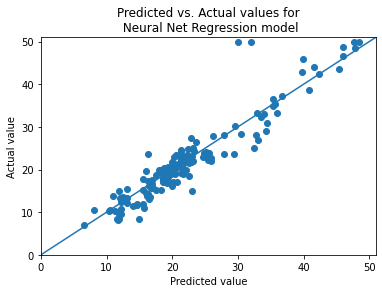

In [11]:
preds = deep_net.forward(X_test).reshape(-1, 1)

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\n Neural Net Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])
plt.show()

In [13]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = deep_net.forward(test_feature).reshape(-1, 1)

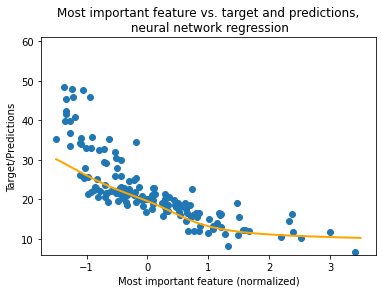

In [18]:
plt.scatter(X_test[:, 12], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([6, 61])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n neural network regression")
plt.show()